In [1]:
%pylab inline

import pandas as pd
import itertools as it

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("../data/raw/sp500_global_feature_pre_final.csv", index_col="Date")

In [3]:
data.sort_index(inplace=True)
data.index = pd.DatetimeIndex(data.index)
to_drop = ["Año", "Mes", "Dia", "class"]
df = data.drop(columns=to_drop)
df.describe()

,GSPC.Open,GSPC.High,GSPC.Low,GSPC.Volume,GSPC.Adjusted,GSPC.Close,Return_GSPC,Return_DJI,Return_HSI,Return_FCHI,...,returnlag2_VIX,returnlag1_VXN,returnlag2_VXN,returnlag1_VXO,returnlag2_VXO,rsi,williams_r,cci,roc,mom
count,3556.000000,3556.000000,3556.000000,3.556000e+03,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,...,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000,3556.000000
mean,1539.534135,1547.796615,1530.799477,3.558227e+09,1539.883602,1539.883602,0.031476,0.029930,0.220130,0.053893,...,0.269496,0.186618,0.187063,0.340067,0.341374,54.387942,0.381384,25.160435,0.000247,0.445841
std,462.842470,462.851985,462.783189,1.343967e+09,462.954721,462.954721,1.162559,1.078400,6.487399,2.994987,...,7.578174,6.328652,6.328717,8.534170,8.533934,11.059471,0.312774,108.598079,0.011641,15.157980
min,679.280029,695.270020,666.789978,5.045800e+08,676.530029,676.530029,-9.034978,-7.873277,-42.760888,-30.105682,...,-29.572651,-26.878610,-26.878610,-31.715458,-31.715458,16.457584,0.000000,-401.396755,-0.094695,-113.189942
25%,1196.502533,1203.789978,1188.895019,2.738022e+09,1197.290039,1197.290039,-0.389790,-0.385755,-0.674470,-0.642934,...,-3.839253,-3.328221,-3.328221,-4.295360,-4.295360,46.291741,0.093289,-56.641942,-0.003906,-5.880005
50%,1377.895019,1387.890015,1371.149964,3.496485e+09,1378.139954,1378.139954,0.064183,0.050185,0.050731,0.032474,...,-0.528944,-0.500590,-0.500590,-0.517978,-0.513919,55.350932,0.305007,53.898311,0.000642,0.989990
75%,1941.365021,1950.984985,1927.592530,4.199352e+09,1940.702515,1940.702515,0.525162,0.502117,0.788766,0.704339,...,3.369162,3.039178,3.039178,4.022796,4.022796,62.799537,0.649847,109.137378,0.005238,7.779937
max,2867.229980,2872.870117,2851.479980,1.145623e+10,2872.870117,2872.870117,11.580037,11.080332,77.054685,44.325805,...,115.597933,59.825750,59.825750,113.674191,113.674191,86.686650,1.000000,286.419348,0.109572,104.130005


In [4]:
gr = df.groupby(pd.cut(df.index, bins=df.index[::5]))

In [5]:
# df.corrwith(df.Return_GSPC)
binned_correlations = gr.apply(lambda df: df.corrwith(df.Return_GSPC))

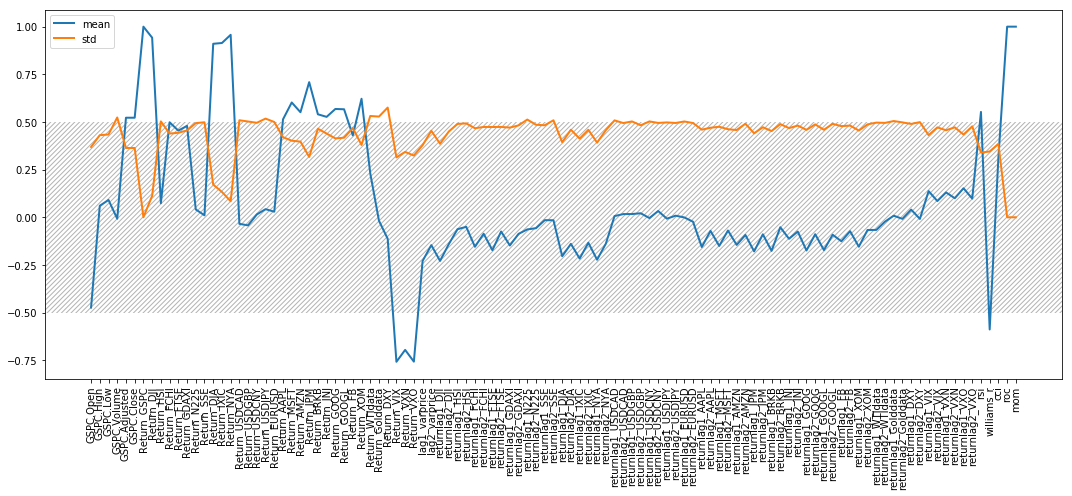

In [6]:
stats = binned_correlations.agg(["mean", "std"]).transpose()
xvals = arange(stats.index.size)

fig, ax = subplots(1,1, figsize=(15,7))
stats.plot(x=xvals, ax=ax, lw=2)
ax.axhspan(-0.5, +0.5, color="0.7", fc="none", hatch="/////", lw=0.0)
ax.set_xticks(xvals)
ax.set_xticklabels(stats.index.values, rotation=90)
fig.tight_layout()
fig.savefig("../data/img/sp500-feature-correlations.png")

In [7]:
filtered_columns = df.columns[np.abs(stats["mean"])>0.5]
filtered_df = data[to_drop+list(filtered_columns)]

In [8]:
filtered_df.reset_index().to_csv("../data/processed/filtered_corr0p5.csv", index=False)